<a href="https://colab.research.google.com/github/jellothere/CNN-vs-MLP/blob/main/automl-cnn-and-mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

     |████████████████████████████████| 166 kB 5.1 MB/s 
     |████████████████████████████████| 97 kB 6.1 MB/s 
     |████████████████████████████████| 454.4 MB 21 kB/s 
     |████████████████████████████████| 4.0 MB 43.9 MB/s 
     |████████████████████████████████| 1.2 MB 39.7 MB/s 
     |████████████████████████████████| 462 kB 51.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68712 sha256=fdcebe8a588a84724e1f023186f2ed6e4a3342dfa2a157260b9d5e83ab50f495
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  A

In [ ]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 41 kB/s 
     |████████████████████████████████| 459 kB 61.7 MB/s 
     |████████████████████████████████| 20.1 MB 34.6 MB/s 
     |████████████████████████████████| 2.9 MB 45.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.2
    Uninstalling tensorflow-2.5.2:


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#Confusion Matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#print the structure of data
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(train_labels[1])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
[9]


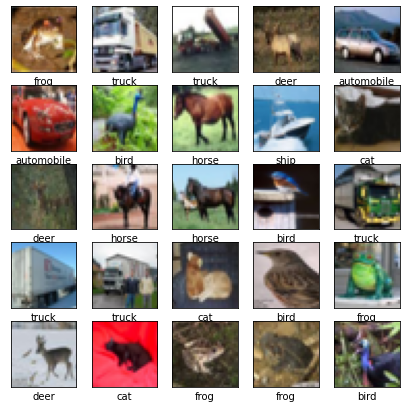

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  #cada etiqueta es un array en este caso de un elemento, pero podrían ser más
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
def create_simple_pm():
  #modelo simple de pm:
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=(32, 32, 3)))
  model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3), name="Input_layer"))
  model.add(tf.keras.layers.Dense(50, activation='sigmoid', name="Hidden_layer"))
  model.add(tf.keras.layers.Dense(10, activation='softmax', name="Output_layer"))
  return model

In [ ]:
def create_model_simple_cnn():
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
  model.add(layers.Dropout(0.5))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.Dropout(0.25))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
  model.add(layers.Dropout(0.5))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
  model.add(layers.Dropout(0.25))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(100, activation='softmax'))
  return model

In [ ]:
def create_simple_pm():
  #modelo simple de pm:
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(32, 32, 3)))
  model.add(layers.Flatten(input_shape=(32, 32, 3), name="Input_layer"))
  model.add(layers.Dense(50, activation='sigmoid', name="Hidden_layer"))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(300, activation='softmax', name="Output_layer"))
  return model

In [ ]:
model = create_model_simple_cnn()
#model = create_simple_pm()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 512)       14336     
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 512)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [ ]:
import autokeras as ak

# Búsqueda automática de un modelo

In [ ]:
### DEFINICIÓN BÚSQUEDA DEL MEJOR MODELO ###

- Si se desea obtener un modelo rápidamente, por favor disminuya trials y epoch

######## CNN

	input_node = ak.ImageInput()
	output_node = ak.Normalization()(input_node)
	output_node = ak.SpatialReduction(reduction_type='flatten')(output_node)
	output_node = ak.DenseBlock()(output_node)
	output_node = ak.ClassificationHead()(output_node)

	auto_model = ak.AutoModel(
 	   inputs=input_node, outputs=output_node, overwrite=False, max_trials=75, directory='./cnn/'
	)

	# Fit de los datos en la búsqueda
	auto_model.fit(train_images, train_labels,epochs=100, validation_data=(test_images, test_labels))

######## MLP

#	input_node = ak.ImageInput()
#	output_node = ak.SpatialReduction(reduction_type='flatten')(output_node)
#	output_node = ak.Normalization()(input_node)
#	output_node = ak.ClassificationHead()(output_node)
#	output_node = ak.DenseBlock()(output_node)

#	auto_model = ak.AutoModel(
#	    inputs=input_node, outputs=output_node, overwrite=True, max_trials=20, directory='./mlp/'
#	)

	# Fit de los datos en la búsqueda
#	auto_model.fit(x_train, y_train,epochs=100, validation_data=(x_test, y_test))



### EXPORTACIÓN A KERAS DEL MEJOR MODELO ENCONTRADO ###

model = auto_model.export_model()

# Importación y análisis del mejor modelo encontrado

In [ ]:
# Importación de los archivos desde Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, json
import pandas as pd

path_to_json = '/content/drive/MyDrive/P2_RNA/auto_model/auto_model/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.startswith('trial')]
jsons = []
print(json_files)
for path in json_files:
  jsons += [path_to_json+path+'/'+pos_json for pos_json in os.listdir(path_to_json+path) if pos_json.endswith('.json')]
print(jsons)  # for me this prints ['foo.json']

['trial_72b29bd7a6d1257ab5140511efae7181', 'trial_7e329bf7addab3074131d22966e56ff0', 'trial_f89b09ed47c7ffe6b1bc7df3d8c24c61', 'trial_c4505626f75172a37b59c6547d827a42', 'trial_8c000a56b6ff0f20006cac8a207fadfc', 'trial_9eeba3e4d587568897bec7df2ca79b9e', 'trial_c66daefb1414ed774d0eae61ed9d5ed6', 'trial_ca2ff640780ef2748234320eb4e19052', 'trial_f0c9a0268b8ba0838efd08da6f8d1eaf', 'trial_c12e063c200574d875110c43868a4182', 'trial_6c3ad9ef2650d11427b7c3f5993c9adb', 'trial_62dcd1c009c7221554953c49d4148872', 'trial_d0eb8bfff684efd812adfff85c0dfc9b', 'trial_aa39e0218cac6263021edb39ed34e154', 'trial_d061cc8f1748ed1b1059c7ee3de978ca', 'trial_c1ac9efe95a5cffa0ed23e5bc6df61fa', 'trial_699dc5f1d50962309832e4fbfc627159', 'trial_4c4e73c1cd5214c6bb4bec10f7fc38b7', 'trial_1a0f8ce5cc6f545d60b4b76fdea637a7', 'trial_980ee3d71e2d9d51782aead7aa9c02f3', 'trial_0ec82015a28cca4896eb092e99f14784', 'trial_c7b97c15ae680e91fee485aed31af7fb', 'trial_deee1c7b25adec0a9973288efff20ef8', 'trial_ff8727a71278c439c55554c651

In [ ]:
accuracies = []
for j in jsons:
  with open(j) as f:
    data = json.load(f)
  accuracies += max([i['value'] for i in data['metrics']['metrics']['val_accuracy']['observations']])
print(max(accuracies))
print(jsons[accuracies.index(max(accuracies))])

0.8658000230789185
/content/drive/MyDrive/P2_RNA/auto_model/auto_model/trial_5eb8dfe1053a9053090dfc3fd079e3aa/trial.json


In [ ]:
hyper = dict()
for j in jsons:
  with open(j) as f:
    data = json.load(f)
    hyper[data['trial_id']] = data['hyperparameters']['values']
hyperparameters = pd.DataFrame.from_dict(hyper, orient='index')
hyperparameters.to_csv('/content/drive/MyDrive/P2_RNA/auto_model/results.csv')

In [ ]:
metrics = dict()
hyper = dict()
for j in jsons:
  with open(j) as f:
    data = json.load(f)
    hyper[data['trial_id']] = data['hyperparameters']['values']
    m = min(d.get('value') for d in data['metrics']['metrics']['val_loss']['observations'])
    step = next(item for item in data['metrics']['metrics']['val_loss']['observations'] if item["value"] == m)['step']
    acc = next(item for item in data['metrics']['metrics']['accuracy']['observations'] if item["step"] == step)['value'][0]
    loss = next(item for item in data['metrics']['metrics']['loss']['observations'] if item["step"] == step)['value'][0]
    val_acc = next(item for item in data['metrics']['metrics']['val_accuracy']['observations'] if item["step"] == step)['value'][0]
    metrics[data['trial_id']] = {'epoch': step, 'loss': loss, 'accuracy': acc, 'val_loss': m[0], 'val_accuracy': val_acc}
hyperparameters = pd.DataFrame.from_dict(hyper, orient='index')
metrics = pd.DataFrame.from_dict(metrics, orient='index')
results = pd.concat([hyperparameters, metrics], axis=1)
results.to_csv('/content/drive/MyDrive/P2_RNA/auto_model/results.csv')

In [ ]:
input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ConvBlock()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.SpatialReduction(reduction_type='flatten')(output_node)
output_node = ak.ClassificationHead()(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=False, max_trials=1, directory='/content/drive/MyDrive/P2_RNA/auto_model'
)

# Feed the image classifier with training data.
auto_model.fit(train_images, train_labels,epochs=100, validation_data=(test_images, test_labels))






In [ ]:
input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.SpatialReduction(reduction_type='flatten')(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=False, max_trials=1, directory='/content/drive/MyDrive/P2_RNA/mlp'
)

# Feed the image classifier with training data.
auto_model.fit(train_images, train_labels,epochs=100, validation_data=(test_images, test_labels))

INFO:tensorflow:Reloading Oracle from existing project /content/drive/MyDrive/P2_RNA/mlp/auto_model/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/MyDrive/P2_RNA/mlp/auto_model/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0972 - accuracy: 0.2632 - val_loss: 1.8028 - val_accuracy: 0.3734
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8589 - accuracy: 0.3412 - val_loss: 1.7122 - val_accuracy: 0.4040
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7858 - accuracy: 0.3707 - val_loss: 1.6594 - val_accuracy: 0.4239
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7296 - accuracy: 0.3928 - val_loss: 1.6215 - val_accuracy: 0.4407
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6843 - accuracy: 0.4090 - val_loss: 1.5927 - val_accuracy: 0.4478
Epoch 6/100
1563/1563 [========

In [ ]:
# Export as a Keras Model.
model = auto_model.export_model()

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 32, 32, 3)         0         
_________________________________________________________________
normalization (Normalization (None, 32, 32, 3)         7         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [ ]:
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)
    #Reading the model from JSON file
with open('fashionmnist_model.json', 'r') as json_file:
    json_savedModel= json_file.read()
print(json_savedModel)

{"class_name": "Functional", "config": {"name": "functional_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 32, 32, 3], "dtype": "uint8", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Custom>CastToFloat32", "config": {"name": "cast_to_float32", "trainable": true, "dtype": "float32"}, "name": "cast_to_float32", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Normalization", "config": {"name": "normalization", "trainable": true, "dtype": "float32", "axis": [-1]}, "name": "normalization", "inbound_nodes": [[["cast_to_float32", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config":

In [ ]:
def create_model_simple_cnn():
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
  model.add(layers.Dropout(0.5))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.Dropout(0.25))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
  model.add(layers.Dropout(0.5))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
  model.add(layers.Dropout(0.25))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(100, activation='softmax'))
  return model

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/P2_RNA/auto_model/auto_model/trial_5eb8dfe1053a9053090dfc3fd079e3aa/checkpoints/epoch_94/')


OSError: ignored

In [ ]:
# Predict with the best model.
predicted_y = auto_model.predict(test_images)
print(predicted_y)


# Evaluate the best model with testing data.
print(auto_model.evaluate(test_images, test_labels))

313/313 [==============================] - 1s 3ms/step
[['3']
 ['8']
 ['8']
 ...
 ['5']
 ['1']
 ['7']]
313/313 [==============================] - 2s 5ms/step - loss: 0.4056 - accuracy: 0.8687
[0.4056055545806885, 0.8687000274658203]


In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 5 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr
lr_scheduler = LearningRateScheduler(decay_schedule)
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
)

In [ ]:
historico = model.fit(train_images, train_labels, epochs=100, validation_freq=1, batch_size=32,
                      validation_data=(test_images, test_labels),callbacks=[lr_scheduler])

Epoch 1/100


ValueError: ignored

In [ ]:
# summarize history for accuracy
plt.plot(historico.history['sparse_categorical_accuracy'])
plt.plot(historico.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()
# summarize history for loss
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
evaluacion=model.evaluate(test_images, test_labels)

ValueError: ignored

In [ ]:
#predicciones en bruto:
raw_testPred = model.predict(test_images)
#prediccion en bruto de los 5 primeros patrones de test: 5 vectores de valores reales
print(raw_testPred[:5])

[[1.63281953e-03 8.27420130e-03 2.95651574e-02 8.33437860e-01
  1.59673933e-02 9.87942070e-02 1.56651495e-03 5.59615655e-05
  9.33935493e-03 1.36652833e-03]
 [7.11202249e-03 8.48561451e-02 1.12508562e-04 1.05654835e-04
  9.43733845e-04 1.43201423e-05 3.06292495e-05 1.96521141e-05
  7.40562737e-01 1.66242570e-01]
 [8.31572890e-01 1.71000063e-02 2.07660883e-03 3.57453158e-04
  1.72067212e-03 1.83047669e-04 3.29285831e-05 7.07785250e-04
  7.56954327e-02 7.05531687e-02]
 [6.75425649e-01 5.82294092e-02 7.51525313e-02 3.30675440e-03
  6.28420487e-02 1.27820659e-03 8.34439823e-04 2.34552640e-02
  9.63516980e-02 3.12404335e-03]
 [2.59781373e-04 2.74991064e-04 7.96050802e-02 4.29956689e-02
  5.58901548e-01 4.14296649e-02 2.74837166e-01 9.78197786e-04
  5.10899525e-04 2.06908589e-04]]


In [ ]:
#predicciones de la clase:
class_testPred = np.argmax(raw_testPred, axis=1)
#predicción de la clase de los 10 primeros patrones de test
print(class_testPred[:20]) #predicciones
print(test_labels[:20,0]) #valores esperados

[3 8 0 0 4 6 5 6 5 1 0 9 5 7 9 5 2 0 8 6]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


[[657  26  40  25  38  14  20  44  87  49]
 [ 31 619  24  32   5  18  23  23  55 170]
 [ 78  13 386 108 137  85  91  70  17  15]
 [ 31  12  63 397  52 227 106  61  16  35]
 [ 37  10 115  78 431  72 123  98  21  15]
 [ 17   7  71 215  61 477  58  64  13  17]
 [ 19  17  47 100  76  48 637  24  12  20]
 [ 23   2  48  74  72  94  29 627   5  26]
 [111  58  23  36  15  21   6  14 654  62]
 [ 48 114   7  52  11  24  18  65  36 625]]


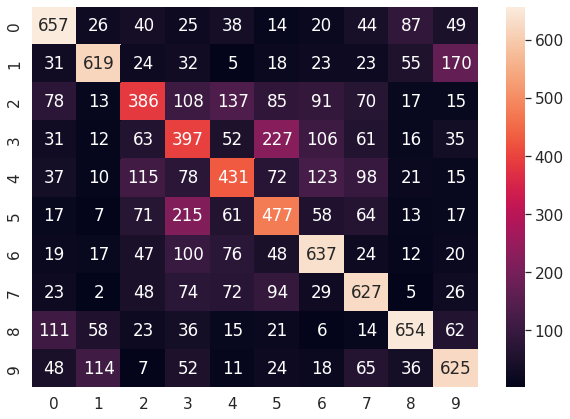

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
#Confusion Matrix
cm=confusion_matrix(test_labels, class_testPred)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='g')

In [ ]:
#guardar resultados
np.savetxt('evaluacion.txt',evaluacion,newline='\t')
np.savetxt('historicoTrainLoss.txt',historico.history['loss'])
np.savetxt('historicoTestLoss.txt',historico.history['val_loss'])
np.savetxt('historicoTrainAcc.txt',historico.history['sparse_categorical_accuracy'])
np.savetxt('historicoTestAcc.txt',historico.history['val_sparse_categorical_accuracy'])
# guardar matriz de confusión
np.savetxt('matrizConf.txt', cm, fmt='%-3d')

In [ ]:
#guarda el modelo completo
model.save('/content/drive/MyDrive/P2_RNA/mlp/mlp_modelo.h5')
#guarda solo pesos
model.save_weights('/content/drive/MyDrive/P2_RNA/mlp/mlp_pesos.h5')